In [3]:
from DRD.calculations import calculations
from DRD.visualizations import visualization
from sklearn import datasets
import pandas as pd

These are import statements. This code is importing the `visualization` and `calculations` modules from two custom packages, as well as the `datasets` module from the popular machine learning library `scikit-learn`.

In [4]:
iris = datasets.load_iris(as_frame=True)
X = iris.data

This code loads the famous Iris dataset from `scikit-learn` and assigns the data to `X`. The `as_frame=True` argument is used to load the data as a pandas DataFrame rather than a NumPy array.

In [5]:

print(f'Original shape: {X.shape}')
embeddings = calculations.ReduceDimensionalityPCA(X)
print(f'Lowered shape: {embeddings.shape}')

Original shape: (150, 4)
Lowered shape: (150, 2)


This code prints out original shape of the data in `X`, performs principal component analysis (PCA) to reduce the dimensionality of the data in `X` to two dimensions, and stores the result in `embeddings`. Then prints out the shape of the data in `embeddings`

In [6]:
graph_h, pred_h, dists_h_dict = calculations.shortest_paths(X)

Min K found: 25


This code uses the `calculations` module to compute the shortest paths in the high-dimensional space defined by `X`, and stores the graph, the predecessor dictionary, and the distances dictionary in `graph_h`, `pred_h`, and `dists_h_dict`, respectively.

In [7]:
graph_l, pred_l, dists_l_dict = calculations.shortest_paths(embeddings)


Min K found: 27


This code uses the `calculations` module to compute the shortest paths in the two-dimensional space defined by `embeddings`, and stores the graph, the predecessor dictionary, and the distances dictionary in `graph_l`, `pred_l`, and `dists_l_dict`, respectively.

In [ ]:
coeffs = calculations.calc_dist_coeff(dists_h_dict, dists_l_dict)

This code uses the `calculations` module to calculate the distortion coefficients, which quantify the degree of distortion incurred by the dimensionality reduction. The function takes the high-dimensional and low-dimensional distances as inputs, which are stored in `dists_h_dict` and `dists_l_dict`, and returns the coefficients, which are stored in `coeffs`.

In [2]:

visualization.interactive_plot(embeddings, True, coeffs, X.index.values, pred_h, pred_l)


    'data': [{'hovertext': [ID: 0, ID: 1, ID: 2, ID: 3, ID: 4, ID…

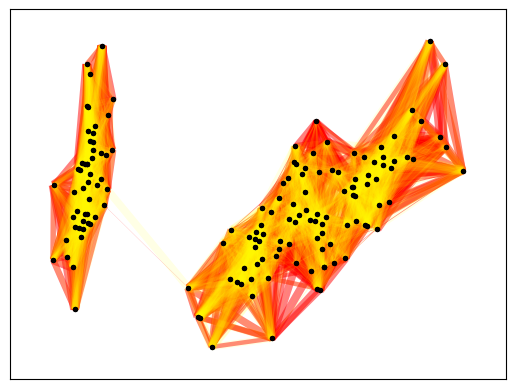

In [18]:
visualization.draw_graph_comparison(embeddings, [
    {
        "graph":graph_l, 
        "dists":dists_l_dict, 
        "color":"red", 
        "alpha":0.5
        },
    {
        "graph":graph_h,
        "dists":dists_h_dict, 
        "color":"yellow", 
        "alpha":0.1
    }
])
        


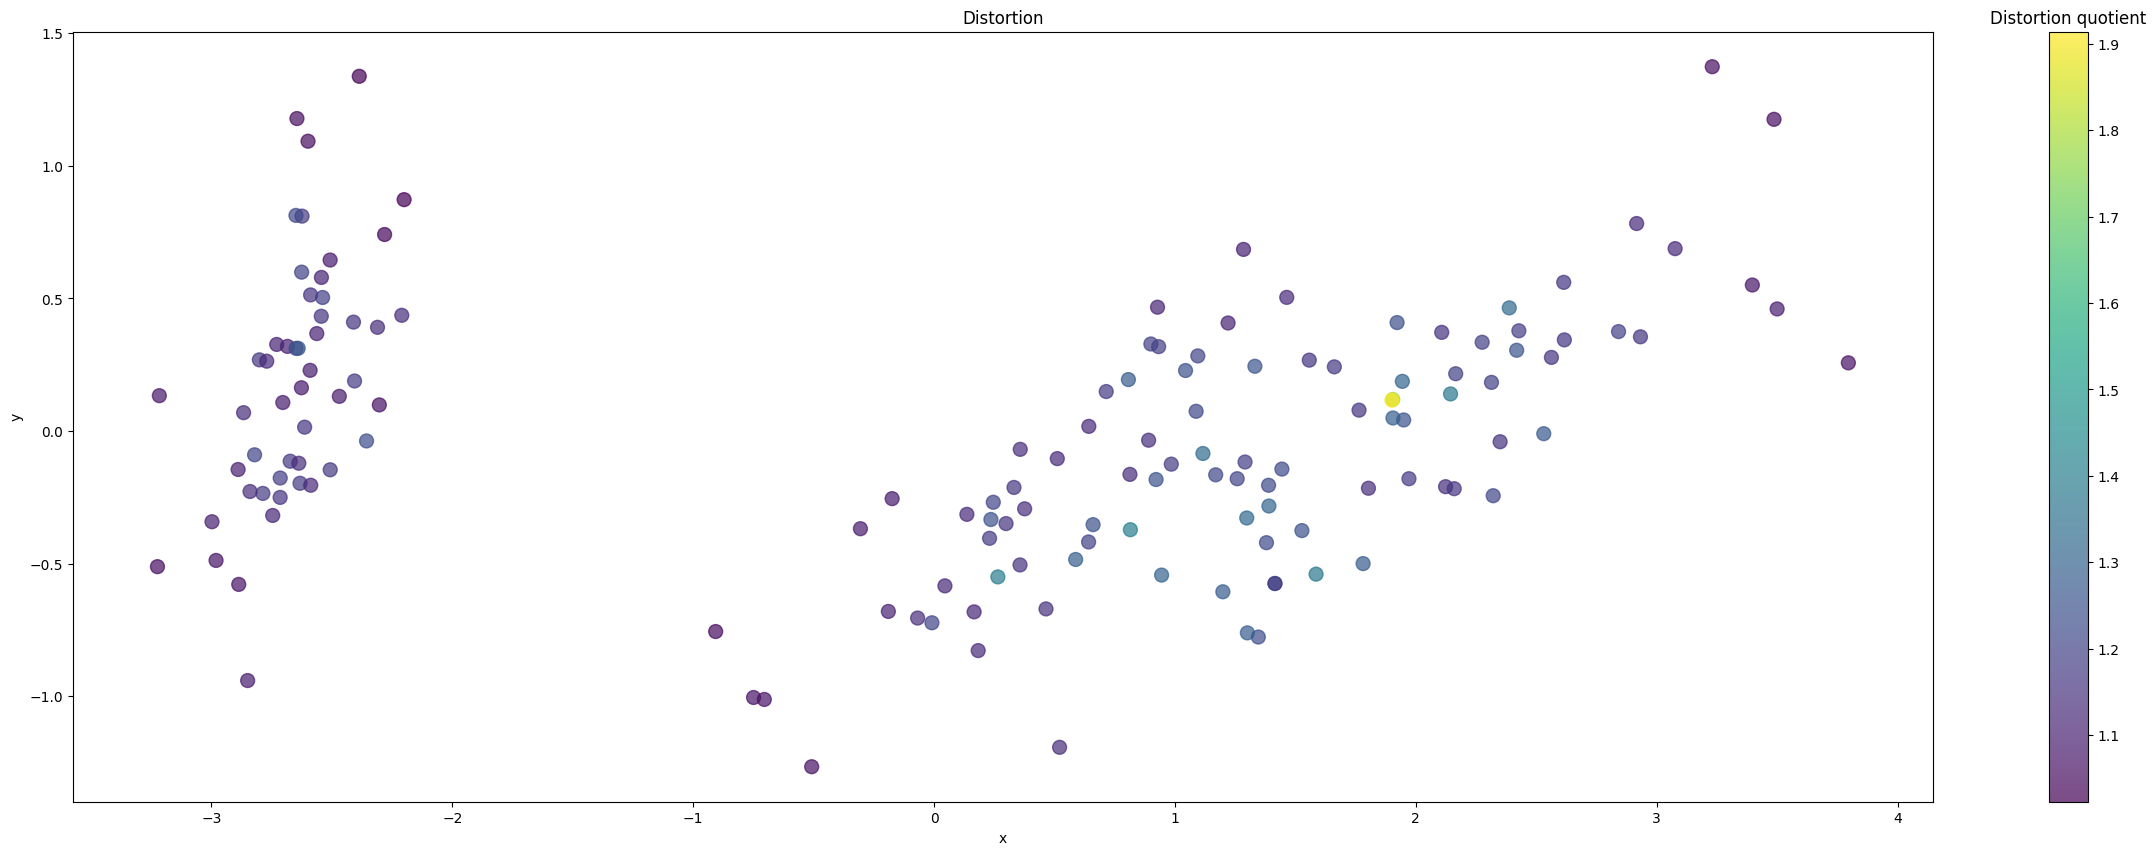

In [21]:
visualization.plot_distortion(embeddings, coeffs, gradient= False, color_points=True)

In [ ]:
# Load the equipment loss data
df = pd.read_csv('data/russia_losses_equipment.csv', sep=',')

# Drop unnecessary columns
df = df.drop(['date', 'greatest losses direction'], axis=1)

# Set the index to the 'day' column
df = df.set_index(['day'])

# Calculate daily losses by taking the difference between consecutive rows
# Fill in missing values with the original values
# Convert the resulting data to integers
df = df.diff().fillna(df).fillna(0).astype(int)

In this code, a CSV file containing equipment loss data is loaded using the `pd.read_csv` function. The unnecessary columns are then removed using the `drop` method of the resulting DataFrame object. The index is set to the 'day' column using the `set_index` method. The `diff` method is then used to calculate daily losses by taking the difference between consecutive rows. The resulting DataFrame object contains some missing values, which are filled in with the original values using the `fillna` method. Finally, the data is converted to integers using the `astype` method.

In [26]:

embeddings = calculations.ReduceDimensionalitySVD(df)
print(f'Original shape: {df.shape}')
graph_h, pred_h, dists_h_dict = calculations.shortest_paths(df)
print(f'Lowered shape: {embeddings.shape}')
graph_l, pred_l, dists_l_dict = calculations.shortest_paths(embeddings)
coeffs = calculations.calc_dist_coeff(dists_h_dict, dists_l_dict)

Original shape: (318, 15)
Min K found: 6
Lowered shape: (318, 2)
Min K found: 3


In [24]:
visualization.interactive_plot(embeddings, True, coeffs, df.index.values, pred_h, pred_l)

    'data': [{'hovertext': [ID: 2, ID: 3, ID: 4, ..., ID: 317, ID…

In [22]:
df.iloc[270:300]

,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
day,,,,,,,,,,,,,,,
274,0,0,1,5,2,0,0,0,10,0,0,0,0,4,51
275,0,0,1,7,6,0,0,0,6,0,0,2,0,4,0
276,0,0,2,4,1,0,0,0,1,0,0,0,0,2,0
277,0,0,4,8,1,0,0,0,1,0,0,0,0,6,0
278,0,0,3,5,2,0,0,0,0,0,0,0,0,4,0
279,2,0,3,5,2,0,0,0,0,0,0,0,0,7,0
280,0,0,3,6,1,0,0,0,7,0,1,0,0,6,0
281,0,0,1,5,2,0,0,0,0,0,0,0,0,12,0
282,0,1,1,6,1,0,0,0,2,0,0,0,0,23,0


In [153]:
df.iloc[62:70]

,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
day,,,,,,,,,,,,,,,
64,2,0,31,47,10,2,22,0,8,0,1,0,0,0,0
65,2,0,16,29,4,0,7,0,14,0,1,0,0,0,0
66,1,0,22,27,1,0,6,0,3,0,4,1,0,0,0
67,2,0,18,26,15,0,0,0,13,0,3,0,0,1796,84
68,2,0,22,48,8,1,0,0,26,0,0,6,0,28,0
69,0,0,14,48,16,10,0,0,20,2,0,0,0,19,0
70,0,0,15,43,16,1,0,0,12,0,1,0,0,24,3
71,2,0,15,41,8,6,0,0,9,0,2,0,0,40,2


In [17]:
df.iloc[:5]

,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
day,,,,,,,,,,,,,,,
2,10,7,80,516,49,4,100,60,0,2,0,0,0,0,0
3,17,19,66,190,0,0,30,0,2,0,0,0,0,0,0
4,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0
5,2,3,0,110,24,17,161,0,1,0,5,0,0,0,0
6,0,0,48,30,3,3,14,0,0,0,2,0,0,0,0
